# Atividades

* Estudar o módulo ortools [1]
* Implementar os modelos de programação por restrição e programação inteira apresentados em [2].
* Implementar a primeira versão do inteligente backtracking [3]
* email: wladimir@lia.ufc.br

* [1] https://developers.google.com/optimization/assignment/assignment_example
* [2] http://repositorio.ufc.br/bitstream/riufc/50955/3/2020_dis_enhdrodrigues.pdf
* [3] https://web.imt-atlantique.fr/x-info/jussien/publications/jussien-WCP97a.pdf




In [1]:
# ! pip install ortools

In [2]:
from ortools.sat.python import cp_model

# Modelo
\begin{align*}
x,y,z & \in & \{0,1,2\}\\
x &\neq& y\\
\end{align*}  

In [3]:
model = cp_model.CpModel()

x = model.NewIntVar(0, 2, 'x')
y = model.NewIntVar(0, 2, 'y')
z = model.NewIntVar(0, 2, 'z')

model.Add( x != y )

solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL:
  print('x = %i' % solver.Value(x))
  print('y = %i' % solver.Value(y))
  print('z = %i' % solver.Value(z))



x = 1
y = 0
z = 0


In [4]:
import networkx as nx
import matplotlib.pyplot as plt


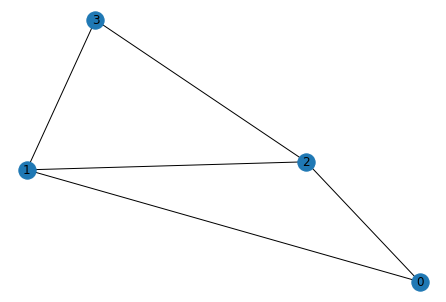

In [5]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([(0,1),(0,2),(1,3),(2,3),(1,2)])
nx.draw(G, with_labels=True)


# Modelo

Seja $G = (V,E)$, onde $|V| = n$

$
\begin{align*}
color[v] & \quad \in & \{1, \ldots, n\} & \quad \forall v \in V\\
color[v] & \quad \neq      & color[u]   & \quad \forall u,v \in E\\ 
\end{align*}
$

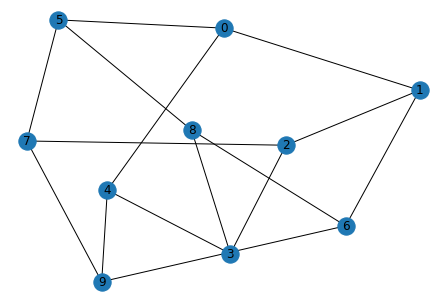

In [6]:
G = nx.petersen_graph()
nx.draw(G, with_labels=True)

In [7]:
model = cp_model.CpModel()

color = []

n = len(G.nodes)

for x in G.nodes:
  name = "x%i" % x
  color.append( model.NewIntVar(1, n, name) )

for (x,y) in G.edges:
  #print ("(%i,%i)" % (x,y) )
  model.Add(color[x-1] != color[y-1] )


solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL:
  for x in G.nodes:
    print("color[%i] = %i" % (x, solver.Value(color[x])) )  

color[0] = 5
color[1] = 4
color[2] = 3
color[3] = 2
color[4] = 3
color[5] = 2
color[6] = 2
color[7] = 1
color[8] = 1
color[9] = 6


# Modelo

Seja $G = (V,E)$, onde $|V| = n$

$
\begin{align*}
min & &  z\\
color[v] & \quad \in & \{1, \ldots, n\} & \quad \forall v \in V\\
color[v] & \quad \neq      & color[u]   & \quad \forall u,v \in E\\ 
z        & \quad =         & max(\{ color[v] ~|~ \forall v \in V\} )\\    
\end{align*}
$



In [8]:
model = cp_model.CpModel()

color = []

z = model.NewIntVar(1, n, 'z')

n = len(G.nodes)

for x in G.nodes:
  name = "x%i" % x
  color.append( model.NewIntVar(1, n, name) )

for (x,y) in G.edges:
  #print ("(%i,%i)" % (x,y) )
  model.Add(color[x-1] != color[y-1] )

model.AddMaxEquality(z, color) 

model.Minimize(z)


solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL:
  for x in G.nodes:
    print("color[%i] = %i" % (x, solver.Value(color[x])) )

color[0] = 1
color[1] = 2
color[2] = 3
color[3] = 2
color[4] = 1
color[5] = 3
color[6] = 3
color[7] = 2
color[8] = 1
color[9] = 3


# Modelo Coloração Gulosa

\begin{align*}
z   & = & \max ~\{ color[v] : v \in V\}\\
P_v & = & \bigcup_{u \in N(v)} \{color[u]\}\\
color[v] & = & \min ~ \{1,2,\ldots, n\} \setminus P_v\\
z        & \in &  ~ \{1,2,\ldots, n\}\\
color    & \in &  ~ \{1,2,\ldots, n\}\\
P_v      & \in &  ~ \{1,2,\ldots, n\}\\
\end{align*}

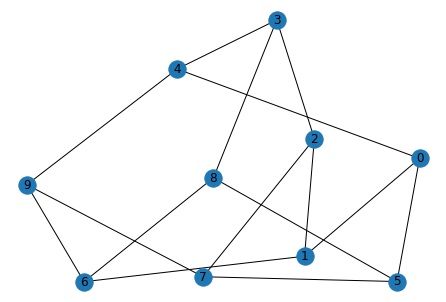

In [9]:
nx.draw(G, with_labels=True)

# Programação por restrições

In [10]:
class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0

    def on_solution_callback(self):
        self.__solution_count += 1
        for v in self.__variables:
            print('%s=%i' % (v, self.Value(v)), end=' ')
        print()

    def solution_count(self):
        return self.__solution_count

model = cp_model.CpModel()

color = []

n = len(G.nodes)

for x in G.nodes:
  name = "x[%i]" % x
  color.append( model.NewIntVar(0, n-1, name) )

# z = model.NewIntVar(0, n-1, 'z')

for x in G.nodes:
  nottabu = []
  # for y in G.adj[x]:
  #   model.Add(color[x]!=color[y])

  for y in G.nodes:    
    if(y not in G.adj[x] and x!=y):
      # nottabu.append(color[y])
      color[x]
      # removeInterval(color[y])
      
  # print("vertex %d" % x)
  # print("nottabu  = ", nottabu)
  # print(color[x])
  # model.AddMinEquality(color[x], nottabu)


max_color = model.NewIntVar(1,n,"max_color")
model.AddMaxEquality(max_color, color)

model.Maximize(max_color) 

# print(model) 

solver = cp_model.CpSolver()
solution_printer = VarArraySolutionPrinter(color)
status = solver.Solve(model, solution_printer)

if status == cp_model.OPTIMAL:
  print("Solução ótima")
  for x in G.nodes:
    print("color[%i] = %i" % (x, solver.Value(color[x])) )
else:
  print("Não é uma solução ótima")
  print('Status = %s' % solver.StatusName(status))
  print('Number of solutions found: %i' % solution_printer.solution_count())
  for x in G.nodes:
    if(color[x]!=None):
       print("color[%i] " % x,color[x])

x[0]=0 x[1]=0 x[2]=0 x[3]=0 x[4]=0 x[5]=0 x[6]=0 x[7]=0 x[8]=0 x[9]=1 
x[0]=0 x[1]=2 x[2]=0 x[3]=0 x[4]=0 x[5]=0 x[6]=0 x[7]=0 x[8]=0 x[9]=0 
x[0]=0 x[1]=0 x[2]=3 x[3]=0 x[4]=0 x[5]=0 x[6]=0 x[7]=0 x[8]=0 x[9]=0 
x[0]=0 x[1]=0 x[2]=0 x[3]=4 x[4]=0 x[5]=0 x[6]=0 x[7]=0 x[8]=0 x[9]=0 
x[0]=0 x[1]=0 x[2]=0 x[3]=0 x[4]=5 x[5]=0 x[6]=0 x[7]=0 x[8]=0 x[9]=0 
x[0]=0 x[1]=0 x[2]=0 x[3]=0 x[4]=0 x[5]=6 x[6]=0 x[7]=0 x[8]=0 x[9]=0 
x[0]=0 x[1]=0 x[2]=0 x[3]=0 x[4]=0 x[5]=0 x[6]=7 x[7]=0 x[8]=0 x[9]=0 
x[0]=0 x[1]=0 x[2]=0 x[3]=0 x[4]=0 x[5]=0 x[6]=0 x[7]=8 x[8]=0 x[9]=0 
x[0]=0 x[1]=0 x[2]=0 x[3]=0 x[4]=0 x[5]=0 x[6]=0 x[7]=0 x[8]=9 x[9]=0 
Solução ótima
color[0] = 0
color[1] = 0
color[2] = 0
color[3] = 0
color[4] = 0
color[5] = 0
color[6] = 0
color[7] = 0
color[8] = 9
color[9] = 0


# Programação Inteira

# Modelo Coloração Gulosa

\begin{align*}
\min & \sum_{c \in C} z_c &  \\  
\\
s.a & & \\
\\
\sum_{c \in C} z_c^x & =1   &  & \forall v \in V\\
x_v^c + x_u^c & \leq z_c &  & \forall \{u,v\} \in E,\forall c \in C \\
x_v^c & \in \{0,1\}    &  &  ~ \forall v \in V , \forall c \in C\\
z_c & \in \{0,1\}     &  &  ~ \forall c \in C\\
\end{align*}


In [11]:
from ortools.linear_solver import pywraplp
import random

solver = pywraplp.Solver.CreateSolver('SCIP')

nodes = list(range(0,len(G.nodes)))
# nodes = list({1,8,9,6,4,7,3,0,2,5})
# nodes = [1,2]
random.shuffle(nodes)
print("nodes ",nodes)


x = {}
for v in nodes:
  for c in G.nodes:
    name = "x[%d,%d]" % (v, c)
    x[v, c] = solver.IntVar(0, 1, name)
z = {}
for c in G.nodes:
  name = "z[%d]" %  c
  z[c] = solver.IntVar(0, 1, name)
 

for v in nodes:
  solver.Add( solver.Sum([ x[v, c] for c in G.nodes]) == 1)

for (u,v) in G.edges:
  for c in G.nodes:
    solver.Add( x[u,c] + x[v,c] <= z[c])


# solver.Minimize(solver.Sum(z[c] for c in G.nodes))

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solução:')
    print('Valor da função Objetivo =', solver.Objective().Value())
    for v in nodes:
      for c in G.nodes:
        print("x[%i,%i] = %i" % (v,c, x[v,c].solution_value() ),end=' ')
      print()
else:
    print('Sem solução ótima.')


nodes  [7, 2, 8, 4, 5, 9, 1, 0, 3, 6]
Solução:
Valor da função Objetivo = 0.0
x[7,0] = 1 x[7,1] = 0 x[7,2] = 0 x[7,3] = 0 x[7,4] = 0 x[7,5] = 0 x[7,6] = 0 x[7,7] = 0 x[7,8] = 0 x[7,9] = 0 
x[2,0] = 0 x[2,1] = 1 x[2,2] = 0 x[2,3] = 0 x[2,4] = 0 x[2,5] = 0 x[2,6] = 0 x[2,7] = 0 x[2,8] = 0 x[2,9] = 0 
x[8,0] = 1 x[8,1] = 0 x[8,2] = 0 x[8,3] = 0 x[8,4] = 0 x[8,5] = 0 x[8,6] = 0 x[8,7] = 0 x[8,8] = 0 x[8,9] = 0 
x[4,0] = 1 x[4,1] = 0 x[4,2] = 0 x[4,3] = 0 x[4,4] = 0 x[4,5] = 0 x[4,6] = 0 x[4,7] = 0 x[4,8] = 0 x[4,9] = 0 
x[5,0] = 0 x[5,1] = 1 x[5,2] = 0 x[5,3] = 0 x[5,4] = 0 x[5,5] = 0 x[5,6] = 0 x[5,7] = 0 x[5,8] = 0 x[5,9] = 0 
x[9,0] = 0 x[9,1] = 1 x[9,2] = 0 x[9,3] = 0 x[9,4] = 0 x[9,5] = 0 x[9,6] = 0 x[9,7] = 0 x[9,8] = 0 x[9,9] = 0 
x[1,0] = 1 x[1,1] = 0 x[1,2] = 0 x[1,3] = 0 x[1,4] = 0 x[1,5] = 0 x[1,6] = 0 x[1,7] = 0 x[1,8] = 0 x[1,9] = 0 
x[0,0] = 0 x[0,1] = 0 x[0,2] = 1 x[0,3] = 0 x[0,4] = 0 x[0,5] = 0 x[0,6] = 0 x[0,7] = 0 x[0,8] = 0 x[0,9] = 0 
x[3,0] = 0 x[3,1] = 0 x[3,2] = 1 x

# Modelo Coloração Grundy

\begin{align*}
\max & \sum_{c \in C} z_c &  \\  
\\
s.a & & \\
\\
\sum_{c \in C} z_c^x & =1   &  & \forall v \in V\\
z_c & \leq \sum_{v \in V} x_v^c &  & \forall c \in C\\
x_v^c + x_u^c & \leq z_c &  & \forall \{u,v\} \in E,\forall c \in C \\
x_v^c & \geq 1 - \sum_{d=1}^{c-1}x_v^d -  \sum_{u\in N(v)}x_u^c       &  &  ~ \forall v \in V , \forall c \in C\\
x_v^c & \in \{0,1\}    &  &  ~ \forall v \in V , \forall c \in C\\
z_c & \in \{0,1\}     &  &  ~ \forall c \in C\\
\end{align*}

Referência: http://repositorio.ufc.br/bitstream/riufc/50955/3/2020_dis_enhdrodrigues.pdf

In [12]:
from ortools.linear_solver import pywraplp

solver = pywraplp.Solver.CreateSolver('SCIP')

x = {}
for v in G.nodes:
  for c in G.nodes:
    name = "x[%d,%d]" % (v, c)
    x[v, c] = solver.IntVar(0, 1, name)

z = {}
for c in G.nodes:
  name = "z[%d]" %  c
  z[c] = solver.IntVar(0, 1, name)
 

for v in G.nodes:
  solver.Add( solver.Sum([ x[v, c] for c in G.nodes]) == 1)

for c in G.nodes:
  solver.Add( z[c] <= solver.Sum([ x[v,c] for v in G.nodes]))


for (u,v) in G.edges:
  for c in G.nodes:
    solver.Add( x[u,c] + x[v,c] <= z[c])

for v in G.nodes:
  for c in G.nodes:
    solver.Add(x[v,c] >= 1 - solver.Sum( x[v,d] for d in range(0,c) ) - solver.Sum(x[u,c] for u in G.adj[v]))

solver.Maximize(solver.Sum(z[c] for c in G.nodes))

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solução:')
    print('Valor da função Objetivo =', solver.Objective().Value())
    for v in G.nodes:
      for c in G.nodes:
        print("x[%i,%i] = %i" % (v,c, x[v,c].solution_value() ),end=' ')
      print()
else:
    print('Sem solução ótima.')




Solução:
Valor da função Objetivo = 4.0
x[0,0] = 0 x[0,1] = 0 x[0,2] = 1 x[0,3] = 0 x[0,4] = 0 x[0,5] = 0 x[0,6] = 0 x[0,7] = 0 x[0,8] = 0 x[0,9] = 0 
x[1,0] = 1 x[1,1] = 0 x[1,2] = 0 x[1,3] = 0 x[1,4] = 0 x[1,5] = 0 x[1,6] = 0 x[1,7] = 0 x[1,8] = 0 x[1,9] = 0 
x[2,0] = 0 x[2,1] = 0 x[2,2] = 0 x[2,3] = 1 x[2,4] = 0 x[2,5] = 0 x[2,6] = 0 x[2,7] = 0 x[2,8] = 0 x[2,9] = 0 
x[3,0] = 0 x[3,1] = 0 x[3,2] = 1 x[3,3] = 0 x[3,4] = 0 x[3,5] = 0 x[3,6] = 0 x[3,7] = 0 x[3,8] = 0 x[3,9] = 0 
x[4,0] = 0 x[4,1] = 1 x[4,2] = 0 x[4,3] = 0 x[4,4] = 0 x[4,5] = 0 x[4,6] = 0 x[4,7] = 0 x[4,8] = 0 x[4,9] = 0 
x[5,0] = 0 x[5,1] = 0 x[5,2] = 0 x[5,3] = 1 x[5,4] = 0 x[5,5] = 0 x[5,6] = 0 x[5,7] = 0 x[5,8] = 0 x[5,9] = 0 
x[6,0] = 0 x[6,1] = 1 x[6,2] = 0 x[6,3] = 0 x[6,4] = 0 x[6,5] = 0 x[6,6] = 0 x[6,7] = 0 x[6,8] = 0 x[6,9] = 0 
x[7,0] = 0 x[7,1] = 1 x[7,2] = 0 x[7,3] = 0 x[7,4] = 0 x[7,5] = 0 x[7,6] = 0 x[7,7] = 0 x[7,8] = 0 x[7,9] = 0 
x[8,0] = 1 x[8,1] = 0 x[8,2] = 0 x[8,3] = 0 x[8,4] = 0 x[8,5] = 0 x[8,6]

# Implementação Coloração gulosa

In [64]:
def mincolor(G,index,color):
    neighbours = set([])
    for y in G.adj[index]:
        if(color[y]!=-1):
            neighbours.add(color[y])
    c = set(range(1,len(G.nodes)))
#     print(c.difference(neighbours))
    return min(c.difference(neighbours)) 

In [150]:
def colorGreedy(G,ordervertex):
    c = []
    for x in G.nodes:
        c.append(-1)
    for index in ordervertex:
        c[index]=mincolor(G,index,c)
    print("vertex color",c)
    return c

In [171]:
nodes = list(range(0,len(G.nodes)))
random.shuffle(nodes)
print("nodes ",nodes)
print("maxcolor",colorGreedy(G,nodes))

nodes  [7, 5, 8, 3, 4, 9, 1, 2, 0, 6]
vertex color [3, 1, 3, 2, 1, 2, 3, 1, 1, 2]
maxcolor [3, 1, 3, 2, 1, 2, 3, 1, 1, 2]


# Coloração de Grundy - Ordenação dos vertices em ordem crescente

In [100]:
def orderSG(G):
    grau = []
    for i in G.nodes:
        grau.append((i,len(G.adj[i])))
    grau.sort(key = lambda x: x[1]) 
    return grau

In [101]:
orderSG(G)

[(0, 3),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 3),
 (5, 3),
 (6, 3),
 (7, 3),
 (8, 3),
 (9, 3)]

In [121]:
def isConflict(G,index,adjacent,c):
    if(c[index]==c[adjacent]):
        return True
    for y in G.adj[adjacent]:
        if(c[adjacent]==c[y] and y!=index):
            return True
    return False
        

In [145]:
def maxcolorNeighbours(G,index,c):
    res=-1
    for y in G.adj[index]:
        res=max(res,c[y])
    return res

In [186]:
def sgNumberGrundy(G,c):
    c = []
    for x in G.nodes:
        c.append(-1)
    aux = orderSG(G)
    for index,grau in aux:
        if(c[index]!=grau-1):
            c[index]=grau
        for y in G.adj[index]:
            c[y]=mincolor(G,y,c)
    print(c)
    return max(c)

In [185]:
# c=nodes.copy()
# print(nodes)
# for no,cor in zip(nodes,colorGreedy(G,nodes)):
#     c[no]=cor

In [187]:
sgNumberGrundy(G,c)

[1, 2, 1, 2, 4, 4, 1, 2, 3, 3]


4

# Intelligent Backtracking

In [199]:
import random

In [200]:
def ColorNull(G):
    c = []
    for x in G.nodes:
        c.append(-1)
    return c


In [201]:
def colorAvailable(G,index,color):
    neighbours = set([])
    for y in G.adj[index]:
        if(color[y]!=-1):
            neighbours.add(color[y])
    c = set(range(1,5))
#     print(c.difference(neighbours))
    return c.difference(neighbours)

In [271]:
def IntelligentBackTracking(G):
    c=ColorNull(G)
    
    Vbar = []
    V = list(G.nodes)
#     print("c ",c)
    print("V ",V)
    while(V!=[]):
        index = random.randint(0,len(V)-1)
        print("index ",index," len",len(V)," v[index]",V[index])
        i = V[index]
        values = colorAvailable(G,index,c)
        print("Values ",values)
        print()
        if(values==[]):
            print("teste")
        else:
            a= min(values)
            c[i]=a
            Vbar.append(V[index])
               
            V.remove(V[index]) 
    print("vertex color ",c)
        
    

In [272]:
IntelligentBackTracking(G)

V  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
index  3  len 10  v[index] 3
Values  {1, 2, 3, 4}

index  1  len 9  v[index] 1
Values  {1, 2, 3, 4}

index  2  len 8  v[index] 4
Values  {2, 3, 4}

index  6  len 7  v[index] 9
Values  {2, 3, 4}

index  3  len 6  v[index] 6
Values  {1, 3, 4}

index  1  len 5  v[index] 2
Values  {2, 3, 4}

index  0  len 4  v[index] 0
Values  {3, 4}

index  2  len 3  v[index] 8
Values  {2, 3, 4}

index  1  len 2  v[index] 7
Values  {4}

index  0  len 1  v[index] 5
Values  {3, 4}

vertex color  [3, 1, 2, 1, 2, 3, 1, 4, 2, 2]
